In [1]:
import time
import os         
import sklearn
import bs4
from bs4 import BeautifulSoup  
import requests
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
%matplotlib inline


In [ ]:
#main url ==> "https://www.goodreads.com/list/show/1.Best_Books_Ever"

    #return an 100-lines array of books url links page 
def get_100_books_to_arr(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"}
    books_links=[]
    r = requests.get(url, headers=headers)
    data = r.text
    books_soup = BeautifulSoup(data)
    for book in books_soup.find_all("tr"):
        new_link="https://www.goodreads.com/"+book.select('tr > td')[2].a["href"]
        books_links.append(new_link)
    return books_links

    # return page of books list url link
def get_next_page_url(page_number):
    main_url = "https://www.goodreads.com/list/show/1.Best_Books_Ever?page="
    new_page_url = main_url + str(page_number)
    return new_page_url
   
def get_Dataframe_of_100_rows(url, books_links):
    
    book_url_page=[]
    
    #rows lists
    rating_num = [] 
    Name = []
    num_page = []     
    Author = []
    User_rating = []
    Reviews = []      
    Year = []
    Language = []
    Genre_1 = []
    Genre_2 = []
    Genre_3 = []
    Publisher = []
     
    for book_page in books_links:
        book_url_page.append(book_page)      
        attemps = 0
        while (attemps <5):
            try:
                headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62"}
                r = requests.get(book_page, headers=headers)
                soup = BeautifulSoup(r.content, "html.parser")
                try:
                    Name.append(soup.find('h1',id="bookTitle").get_text().strip())
                except:
                    Name.append(np.nan)
                try:
                    Author.append(soup.find('a',attrs = {"class":"authorName"}).get_text())
                except:
                    Author.append(np.nan)
                try:
                     num_page.append(soup.find('span',attrs = {"itemprop":"numberOfPages"}).get_text().split("pages")[0].strip())
                except:
                    num_page.append(np.nan)
                try:
                    Language.append(soup.find('div',attrs = {"class":"infoBoxRowItem", "itemprop":"inLanguage"}).get_text())
                except:
                    Language.append(np.nan)
                try:
                    User_rating.append(soup.find('span',attrs = {"itemprop":"ratingValue"}).get_text().strip())
                except:
                    User_rating.append(np.nan)
                try:
                    rating_num.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("ratings")[0][-14:].strip().replace(',',''))
                except:
                    rating_num.append(np.nan)
                try:
                    Reviews.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("reviews")[0][-14:].strip().replace(',',''))
                except:
                    Reviews.append(np.nan)
                try:
                    Genre_1.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[0].get_text())
                except:
                    Genre_1.append(np.nan)
                try:
                    Genre_2.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[1].get_text())
                except:
                    Genre_2.append(np.nan)
                try:
                    Genre_3.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[2].get_text())
                except:
                    Genre_3.append(np.nan)
                try:
                    Year.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[0].split("\n")[2].strip()[-4:])
                except:
                    Year.append(np.nan) 
                try:
                    Publisher.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[1].split("\n")[0].strip())
                except:
                    Publisher.append(np.nan)
                break #Get Out Of 'While' Loop
            except:
                attemps += 1
                
        if (attemps == 5):
            Name.append(np.nan)
            Author.append(book_page)
            num_page.append(np.nan)
            Language.append(np.nan)
            User_rating.append(np.nan)
            rating_num.append(np.nan)
            Reviews.append(np.nan)  
            Genre_1.append(np.nan)
            Genre_2.append(np.nan)
            Genre_3.append(np.nan) 
            Year.append(np.nan)
            Publisher.append(np.nan)
            
    df = pd.DataFrame({'Name':Name,'Author':Author,'num_page':num_page,'Language':Language,'User_rating':User_rating,'rating_num':rating_num,'Reviews':Reviews, 'Genre_1':Genre_1,'Genre_2':Genre_2,'Genre_3':Genre_3,'Year':Year,'Publisher':Publisher,'book_url': book_url_page})
    
    return df

def create_complete_DataFrame(num_of_pages):
    column_names = ["Name", "Author", "num_page","Language","User_rating","rating_num","Reviews","Genre_1","Genre_2","Genre_3","Year","Publisher","book_url"]
    df = pd.DataFrame(columns = column_names)    
    main_url = "https://www.goodreads.com/list/show/1.Best_Books_Ever"
    for index in range(num_of_pages):
        Nth_page_url = get_next_page_url(index+1) #Nth means the '1st', '2nd', '3rd','4th','5th' ... page
        books_links_per_page_list = get_100_books_to_arr(Nth_page_url)
        new_df = get_Dataframe_of_100_rows(Nth_page_url,books_links_per_page_list)
        df = pd.concat([df, new_df],ignore_index=True)
    return df    
        
        


                            Warning! 
Becarefull to use next cell ! it may take a very long time to finish proccessing

In [ ]:
#Becareful to use this function
df=create_complete_DataFrame(1)

Next Cell is to combine 2 or more dataframes with missing values to create one whole dataframe without missing values at all

In [ ]:
#index_list = list(range(100))
df_dummy1 = pd.read_csv("Dummy_True1.csv")
df_dummy2 = pd.read_csv("Dummy_True2.csv")
df_dummy2 = pd.read_csv("Dummy_True_Daniel_1.csv")
df_complete = df_dummy1.combine_first(df_dummy2)
df_complete = df_complete.combine_first(Dummy_True_Daniel_1.csv)
# df_complete = df_complete.dropna(axis=0)
# df_complete = df_complete.drop_duplicates()
#df_complete.info() #
#df_complete.to_csv("Drop_d.csv") #Optional
#pd.set_option('display.max_rows', None) #To print all rows
#df_complete

In [4]:
df3 = pd.read_csv("complete.csv")

<font size="5">Missing Urls</font>

In [144]:
#####missing URL#########
def get_miss_url(df3):
    miss_url = []
    for index,row in df3.iterrows():
        if(pd.isnull(row['Name'])):
             miss_url.append(df3.iloc[index]["book_url"])  
    return miss_url

['https://www.goodreads.com//book/show/10799.A_Farewell_to_Arms',
 'https://www.goodreads.com//book/show/3008.A_Little_Princess',
 'https://www.goodreads.com//book/show/6088007-neuromancer',
 'https://www.goodreads.com//book/show/3462.The_Rescue',
 'https://www.goodreads.com//book/show/394469.Suttree',
 'https://www.goodreads.com//book/show/7670.The_Andromeda_Strain',
 'https://www.goodreads.com//book/show/275000.Fire_and_Ice',
 'https://www.goodreads.com//book/show/146746.The_Jewel_in_the_Crown',
 'https://www.goodreads.com//book/show/10128428-wonderstruck',
 'https://www.goodreads.com//book/show/39863515-an-anonymous-girl',
 'https://www.goodreads.com//book/show/20569957-interview-with-a-master',
 'https://www.goodreads.com//book/show/144791.Seven_Deadly_Wonders',
 'https://www.goodreads.com//book/show/19155234-the-cellar',
 'https://www.goodreads.com//book/show/259655.The_Encyclopedia_of_the_Dead']

In [ ]:
def df_last_with_missing_url(miss_url):
## Search on missing URL. iterate untill getting no missing values  13 TOTAL
    book_url_page=[]

    #rows lists
    rating_num = [] 
    Name = []
    num_page = []     
    Author = []
    User_rating = []
    Reviews = []      
    Year = []
    Language = []
    Genre_1 = []
    Genre_2 = []
    Genre_3 = []
    Publisher = []

    for book_page in miss_url:
        book_url_page.append(book_page)      

        headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62"}
        r = requests.get(book_page, headers=headers)
        soup = BeautifulSoup(r.content, "html.parser")

        try:
            Name.append(soup.find('h1',id="bookTitle").get_text().strip())
        except:
            Name.append(np.nan)
        try:
            Author.append(soup.find('a',attrs = {"class":"authorName"}).get_text())
        except:
            Author.append(np.nan)
        try:
             num_page.append(soup.find('span',attrs = {"itemprop":"numberOfPages"}).get_text().split("pages")[0].strip())
        except:
            num_page.append(np.nan)
        try:
            Language.append(soup.find('div',attrs = {"class":"infoBoxRowItem", "itemprop":"inLanguage"}).get_text())
        except:
            Language.append(np.nan)
        try:
            User_rating.append(soup.find('span',attrs = {"itemprop":"ratingValue"}).get_text().strip())
        except:
            User_rating.append(np.nan)
        try:
            rating_num.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("ratings")[0][-12:].strip().replace(',',''))
        except:
            rating_num.append(np.nan)
        try:
            Reviews.append(soup.find('div',attrs = {"class":"reviewControls--left greyText"}).get_text().split("reviews")[0][-12:].strip().replace(',',''))
        except:
            Reviews.append(np.nan)
        try:
            Genre_1.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[0].get_text())
        except:
            Genre_1.append(np.nan)
        try:
            Genre_2.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[1].get_text())
        except:
            Genre_2.append(np.nan)
        try:
            Genre_3.append(soup.find_all('a',attrs = {"class":"actionLinkLite bookPageGenreLink"})[2].get_text())
        except:
            Genre_3.append(np.nan)
        try:
            Year.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[0].split("\n")[2].strip()[-4:])
        except:
            Year.append(np.nan) 
        try:
            Publisher.append(soup.find_all('div',{"class":"row"})[1].get_text().split("by")[1].split("\n")[0].strip())
        except:
            Publisher.append(np.nan)
    df_last = pd.DataFrame({'Name':Name,'Author':Author,'num_page':num_page,'Language':Language,'User_rating':User_rating,'rating_num':rating_num,'Reviews':Reviews, 'Genre_1':Genre_1,'Genre_2':Genre_2,'Genre_3':Genre_3,'Year':Year,'Publisher':Publisher,'book_url': book_url_page})  
    return df_last

In [ ]:
df_last = pd.DataFrame({'Name':Name,'Author':Author,'num_page':num_page,'Language':Language,'User_rating':User_rating,'rating_num':rating_num,'Reviews':Reviews, 'Genre_1':Genre_1,'Genre_2':Genre_2,'Genre_3':Genre_3,'Year':Year,'Publisher':Publisher,'book_url': book_url_page})

In [6]:
def combine_and_clean(df_last,df3):
    frames = [df_last, df3]
    result = pd.concat(frames)
    result['Language'].fillna(result['Language'].mode()[0], inplace=True)
    result['Publisher'].fillna(result['Publisher'].mode()[0], inplace=True)
    result['Genre_1'].fillna(result['Genre_1'].mode()[0], inplace=True)
    result['Genre_2'].fillna(result['Genre_1'].mode()[0], inplace=True)
    result['Genre_3'].fillna(result['Genre_1'].mode()[0], inplace=True)
    result['Reviews'].fillna(result['Reviews'].median(), inplace=True)
    result['num_page'].fillna(result['num_page'].median(), inplace=True)
    result['Year'].fillna(result['Year'].median(), inplace=True)
    #delete nan rows
    for index,row in result.iterrows():
        if(pd.isnull(row['Name'])):
            result.drop([index],axis = 0,inplace = True)
    #deleteing unneeded columns
    result.drop(labels = ["Unnamed: 0","Unnamed: 0.1","book_url"],axis = 1, inplace = True) 
    result.to_csv("End1.csv")
    return result
    

In [7]:
## for deleting rows but maybe didnt use
# for index,row in result.iterrows():
#     if(pd.isnull(row['Name'])):
#          result.drop(labels = [],axis = 1,inplace = True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7014 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7014 non-null   int64  
 1   Name          7000 non-null   object 
 2   Author        7000 non-null   object 
 3   num_page      6985 non-null   float64
 4   Language      6963 non-null   object 
 5   User_rating   7000 non-null   float64
 6   rating_num    7000 non-null   float64
 7   Reviews       6999 non-null   float64
 8   Genre_1       6996 non-null   object 
 9   Genre_2       6991 non-null   object 
 10  Genre_3       6985 non-null   object 
 11  Year          6991 non-null   float64
 12  Publisher     6958 non-null   object 
 13  book_url      7014 non-null   object 
 14  Unnamed: 0.1  7000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 876.8+ KB


In [8]:
#result had little cleaning and saved has maybe1
#result2 = pd.read_csv("maybe1.csv")
result['Language'].fillna(result['Language'].mode()[0], inplace=True)
result['Publisher'].fillna(result['Publisher'].mode()[0], inplace=True)
result['Genre_1'].fillna(result['Genre_1'].mode()[0], inplace=True)
result['Genre_2'].fillna(result['Genre_1'].mode()[0], inplace=True)
result['Genre_3'].fillna(result['Genre_1'].mode()[0], inplace=True)
result['Reviews'].fillna(result['Reviews'].median(), inplace=True)
result['num_page'].fillna(result['num_page'].median(), inplace=True)
result['Year'].fillna(result['Year'].median(), inplace=True)
#fill all the missing cells
result.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7014 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7014 non-null   int64  
 1   Name          7000 non-null   object 
 2   Author        7000 non-null   object 
 3   num_page      7014 non-null   float64
 4   Language      7014 non-null   object 
 5   User_rating   7000 non-null   float64
 6   rating_num    7000 non-null   float64
 7   Reviews       7014 non-null   float64
 8   Genre_1       7014 non-null   object 
 9   Genre_2       7014 non-null   object 
 10  Genre_3       7014 non-null   object 
 11  Year          7014 non-null   float64
 12  Publisher     7014 non-null   object 
 13  book_url      7014 non-null   object 
 14  Unnamed: 0.1  7000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 876.8+ KB


In [9]:
#delete nan rows
for index,row in result.iterrows():
    if(pd.isnull(row['Name'])):
        result.drop([index],axis = 0,inplace = True)
#deleteing unneeded columns
result.drop(labels = ["Unnamed: 0","Unnamed: 0.1","book_url"],axis = 1, inplace = True)        

In [3]:
result.to_csv("End1.csv")#NOW I GUESS ITS PERFECT#
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6999 non-null   int64  
 1   Name         6999 non-null   object 
 2   Author       6999 non-null   object 
 3   num_page     6999 non-null   int64  
 4   Language     6999 non-null   object 
 5   User_rating  6999 non-null   float64
 6   rating_num   6999 non-null   int64  
 7   Reviews      6999 non-null   int64  
 8   Genre_1      6999 non-null   object 
 9   G_1_id       6999 non-null   int64  
 10  fiction      6999 non-null   int64  
 11  non_fiction  6999 non-null   int64  
 12  Genre_2      6999 non-null   object 
 13  Genre_3      6999 non-null   object 
 14  Year         6999 non-null   int64  
 15  Publisher    6999 non-null   object 
dtypes: float64(1), int64(8), object(7)
memory usage: 875.0+ KB


<font size="2">We didn't implement this code, but yet we chose to keep the code to demonstrate how we prepared for Machine Learning.

We Created with Excel Software a human-classfied genres to Binary options: Fiction or Non-Fiction list

    Fiction Genre = '1'
    Non-Ficion Genre = '-1'
    Neutral  = '0'
    
for machine learning module we created mirror column to the binary 'fiction' column called 'non_fiction' </font>

In [ ]:
classified_genres_df = pd.read_csv("Genre_fiction_non_fiction.csv")
#classified_genres_df
Fiction_genres_list = (classified_genres_df[classified_genres_df['classification']== 1])['Genre_name'].tolist()
Neutral_genres_list = (classified_genres_df[classified_genres_df['classification']== 0])['Genre_name'].tolist()
Non_Fiction_genres_list= (classified_genres_df[classified_genres_df['classification']== -1])['Genre_name'].tolist()
fiction_arr = []
non_fiction_arr=[]

for index, row in df.iterrows():
    fict =0
    for genre in ['Genre_1','Genre_2','Genre_3']:
        #print("gen: ",row[genre])
        if row[genre] in Fiction_genres_list :
            fict +=1
        elif row[genre] in Non_Fiction_genres_list:
            fict -=1        
       
            
    if fict > 0: #fiction
        fiction_arr.append(row['Name'])
    elif fict < 0:
        non_fiction_arr.append(row['Name'])        
    else: #fict = 0 or neutral
        if row['Genre_1'] in Fiction_genres_list:
            fiction_arr.append(row['Name'])
        else:
            non_fiction_arr.append(row['Name'])        
    
df['fiction'] = 0
df['non_fiction']=0
fict_list = list()
non_fict_list = list()
for name in df['Name']:
    fict_list.append(1) if name in fiction_arr else fict_list.append(0)
    non_fict_list.append(0) if name in fiction_arr else non_fict_list.append(1)
df['fiction']= fict_list
df['non_fiction'] = non_fict_list


<font size="5">Final DataFrame</font>


In [12]:
df.head()

,Name,Author,num_page,Language,User_rating,rating_num,Reviews,Genre_1,G_1_id,fiction,non_fiction,Genre_2,Genre_3,Year,Publisher
0,A Farewell to Arms,Ernest Hemingway,293,English,3.81,283881,10879,Classics,4,1,0,Fiction,Historical,2004,Arrow Books
1,A Little Princess,Frances Hodgson Burnett,242,English,4.20,287556,8086,Classics,4,1,0,Fiction,Childrens,2002,Penguin Books
2,Neuromancer,William Gibson,292,English,3.90,285887,10999,Science Fiction,7,1,0,Fiction,Science Fiction,2000,Ace
3,The Rescue,Nicholas Sparks,352,English,4.11,175314,4124,Romance,3,1,0,Fiction,Womens Fiction,2005,Grand Central Publishing
4,Suttree,Cormac McCarthy,471,English,4.18,19123,1578,Fiction,1,1,0,Gothic,Southern Gothic,1992,Vintage International


<AxesSubplot:xlabel='Genres', ylabel='rating'>

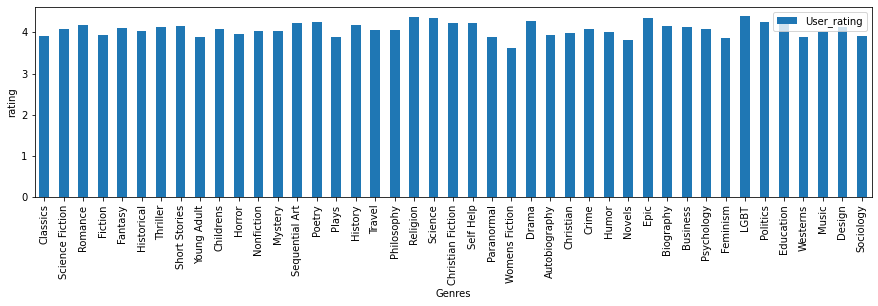

In [13]:
#diagramof rating avarage per genre of years :2003,2005,2019 (combined)
years = [2000,2001,2002,2003]
#create list of all genres exist in array 'years' 
df_top_year = df[df["Year"].isin(years)]
#col_one_list = df['Genre_1'].tolist()
#col_one_arr = df['Genre_1'].to_numpy()
unique_arr = df["Genre_1"].unique()
mean_genres_arr = []
#print("type:", type(df_top_year.groupby(df_top_year["Genre_1"].loc[df_top_year.Genre_1 == "Classics"]).User_rating.mean()))

for genre in unique_arr :
    mean_genres_arr.append(df_top_year.groupby(df_top_year["Genre_1"].loc[df_top_year.Genre_1 == genre]).User_rating.mean())
    #df_top_year.groupby(genre, as_index=False)['User_rating'].mean()
#print(mean_genres_arr)
xy = pd.DataFrame(mean_genres_arr)
xy
for genre in  unique_arr:
    try:
        xy[genre] = xy[genre].mean()
    except:
        continue
        
xy.drop_duplicates(inplace=True)
xy = xy.swapaxes("index", "columns")
xy_10 = xy.iloc[0:10]
xy.plot(kind = 'bar',xlabel ="Genres",ylabel="rating",figsize=(15,3.5))

Grouped Bars Plot Creation #


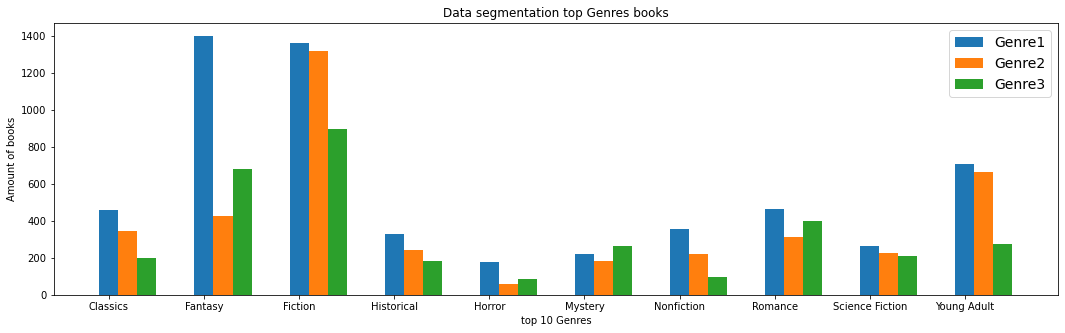

In [2]:
#Create Data to Group Bar Plot
df = pd.read_csv("df_1.csv")
num_top_elements = 10
Genre1_top_10 = df['Genre_1'].value_counts()[0:num_top_elements].sort_index()
top_10_names = Genre1_top_10.index
Genre2_top_10_of_G1=df['Genre_2'].value_counts()[top_10_names].sort_index()
Genre3_top_10_of_G1= df['Genre_3'].value_counts()[top_10_names].sort_index()

f, ax = plt.subplots(figsize=(18,5))
x = np.arange(10)
y1= Genre1_top_10.values
y2= Genre2_top_10_of_G1.values
y3=Genre3_top_10_of_G1.values
width = 0.20
plt.bar(x, y1, width,tick_label = top_10_names,align='center',label='Genre1')
plt.bar(x+0.2, y2, width,label='Genre2')
plt.bar(x+0.4, y3, width,align='center',label='Genre3')
plt.ylabel("Amount of books")
plt.xlabel("top 10 Genres")
plt.title("Data segmentation top Genres books")
ax.legend(fontsize = 14)
plt.show()


Pie Plot Top 3 Authors #

In [3]:
#Create 3 df of all genres of the top 3 Authors
top_3_authors = df["Author"].value_counts()[0:3].sort_index().index.to_list()
df_of_top_three_Authors = df[df['Author'].isin(top_3_authors)]
df_of_top_three_Authors = df_of_top_three_Authors.sort_values(by = "Author").reset_index()
# pd.set_option('display.max_rows', None)
df_of_top_three_Authors.reset_index(inplace =True)
df_of_top_three_Authors['Author'].value_counts()
#df_of_top_three_Authors

Stephen King       60
Terry Pratchett    39
Rick Riordan       32
Name: Author, dtype: int64

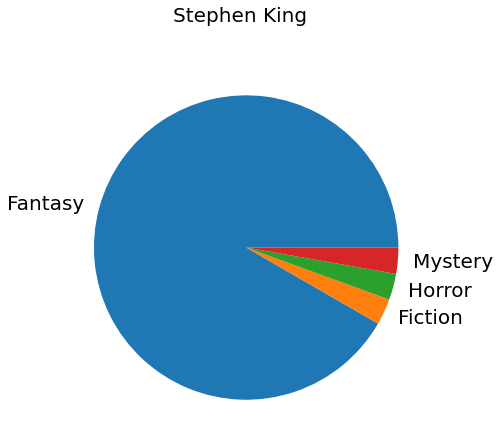

In [5]:
df1 = df_of_top_three_Authors.iloc[:36,:]
df2 = df_of_top_three_Authors.iloc[36:96,:]
df3 = df_of_top_three_Authors.iloc[96:,:]
df1_G = df1['Genre_1'].value_counts()[0:].sort_index()
df2_G = df2['Genre_1'].value_counts()[0:].sort_index()
df3_G = df3['Genre_1'].value_counts()[0:].sort_index()


#df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                     'radius': [2439.7, 6051.8, 6378.1]},
#                    index=['Mercury', 'Venus', 'Earth'])

fig, axs = plt.subplots(1)

fig.suptitle("Stephen King", fontsize=20)
plot =df1_G.plot.pie(y=df1_G, figsize=(7, 7),ylabel ='',fontsize = 20)

#fig.suptitle("Terry Pratchett", fontsize=20)
#plot =df2_G.plot.pie(y=df2_G, figsize=(7, 7),ylabel ='',fontsize = 20)

#fig.suptitle("Rick Riordan", fontsize=20)
#plot =df3_G.plot.pie(y=df3_G, figsize=(7, 7),ylabel ='',fontsize = 20)



density of user rating

C:\Users\liors\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'תופיפצ')

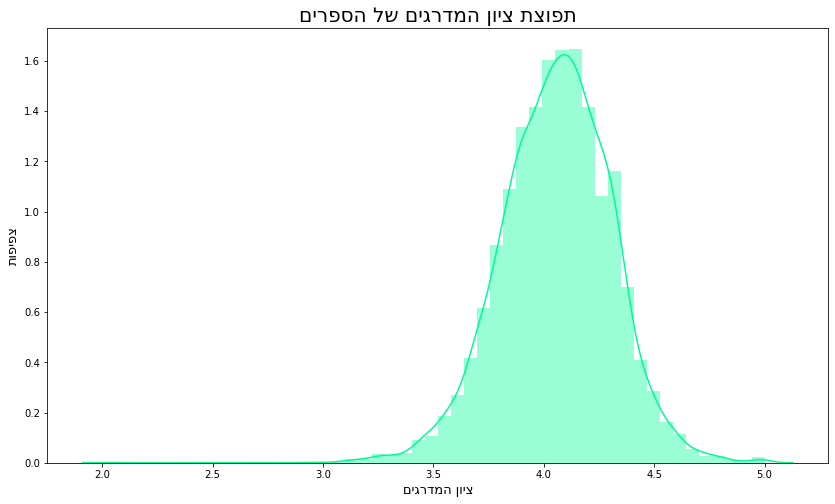

In [4]:
dist = df
dist.User_rating = dist.User_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['User_rating'],ax=ax,color='mediumspringgreen')
ax.set_title('םירפסה לש םיגרדמה ןויצ תצופת',fontsize=20)
ax.set_xlabel('םיגרדמה ןויצ',fontsize=13)
ax.set_ylabel('תופיפצ',fontsize=13)


In [5]:
dist = df[~(df['num_page']>1000)]

C:\Users\liors\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\liors\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'תופיפצ')

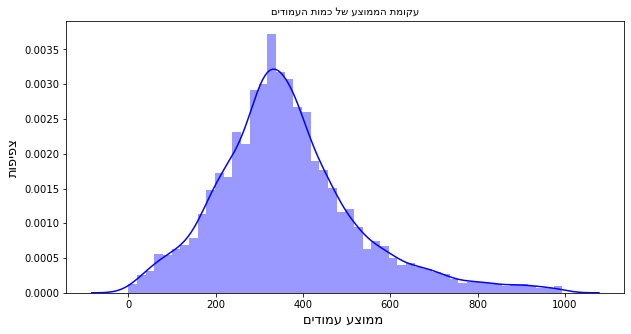

In [6]:
dist.num_page = dist.num_page.astype(float)
fig, ax = plt.subplots(figsize=[10,5])
sns.distplot(dist['num_page'],ax=ax,color = 'blue' )
ax.set_title('םידומעה תומכ לש עצוממה תמוקע',fontsize=10)
#םידומעה תומכ לש עצוממה תמוקע
#ממוצע עמודים
#םידומע עצוממ
#עקומת הממוצע של כמות העמודים
ax.set_xlabel('םידומע עצוממ ',fontsize=13)
ax.set_ylabel('תופיפצ',fontsize=13)

<Figure size 1080x720 with 0 Axes>

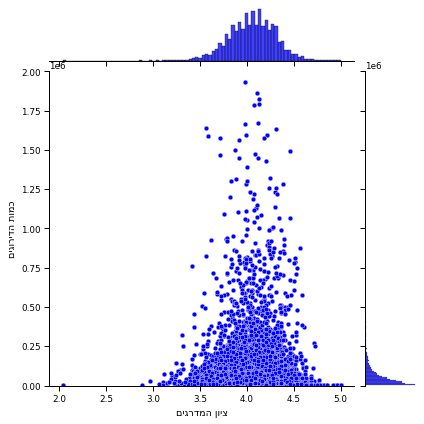

In [8]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="User_rating",y='rating_num', kind='scatter',  data= df, color = 'blue',ylim = (0,2000000))
ax.set_axis_labels("םיגרדמה ןויצ", "םיגורידה תומכ")
plt.show()

<Figure size 1080x720 with 0 Axes>

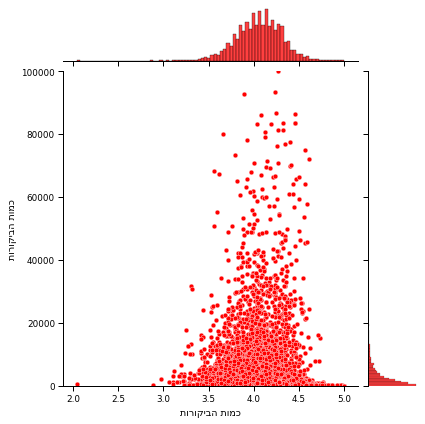

In [9]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="User_rating",y='Reviews', kind='scatter',  data= df, color = 'red',ylim = (0,100000))
ax.set_axis_labels("תורוקיבה תומכ", "תורוקיבה תומכ")
plt.show()

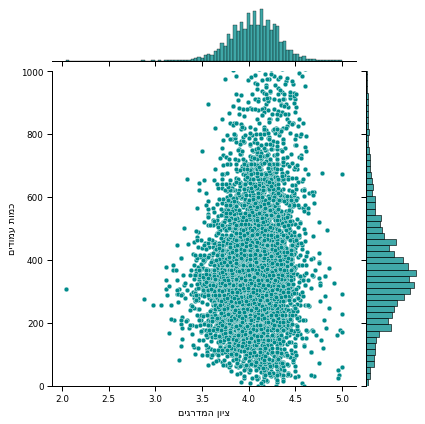

In [11]:

ax = sns.jointplot(x="User_rating", y="num_page", data = df, color = 'darkcyan',ylim = (0,1000))
ax.set_axis_labels("םיגרדמה ןויצ", "םידומע תומכ")

/Users/danielsh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre_1'>

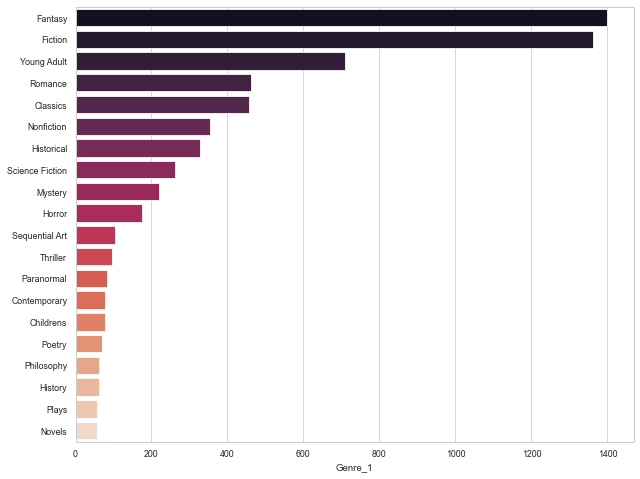

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(df.Genre_1.value_counts().head(20),df.Genre_1.value_counts().head(20).index,palette = 'rocket')

<font size="5">Machine Learning: User Rating to Number of Pages #</font>


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2562 entries, 0 to 6982
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2562 non-null   int64  
 1   Name         2562 non-null   object 
 2   Author       2562 non-null   object 
 3   num_page     2562 non-null   int64  
 4   Language     2562 non-null   object 
 5   User_rating  2562 non-null   float64
 6   rating_num   2562 non-null   int64  
 7   Reviews      2562 non-null   int64  
 8   Genre_1      2562 non-null   object 
 9   G_1_id       2562 non-null   int64  
 10  fiction      2562 non-null   int64  
 11  non_fiction  2562 non-null   int64  
 12  Genre_2      2562 non-null   object 
 13  Genre_3      2562 non-null   object 
 14  Year         2562 non-null   int64  
 15  Publisher    2562 non-null   object 
dtypes: float64(1), int64(8), object(7)
memory usage: 340.3+ KB


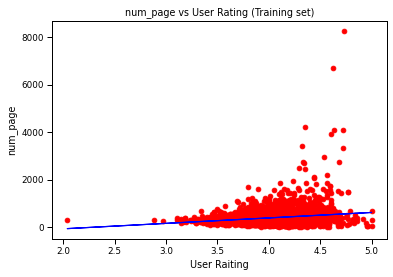

In [15]:
df = pd.read_csv("df_1.csv")
fixed_df = df.drop(df[ df['rating_num'] <= 50000 ].index)
fixed_df.drop(fixed_df[ fixed_df['Reviews'] <= 2500 ].index, inplace =True)
fixed_df.drop(fixed_df[ fixed_df['num_page'] <= 100 ].index,inplace=True)
fixed_df.info()

# data preprocessing
df_shape =df[{'num_page','User_rating'}]
X = df_shape.iloc[:, :-1].values  #independent variable array
y = df_shape.iloc[:,1].values   #dependent variable vector
 
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
 
# fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data
 
# predicting the test set results
y_pred = regressor.predict(X_test) 
 
# visualizing the results
#plot for the TRAIN
  
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("num_page vs User Rating (Training set)") # stating the title of the graph
  
plt.xlabel("User Raiting") # adding the name of x-axis
plt.ylabel("num_page") # adding the name of y-axis
plt.show() # specifies end of graph
 

<font size="5">Machine Learning: Trying to predict User Rating</font>

In [2]:
df3 = pd.read_csv("df.csv")

In [3]:
df2 = df3.drop(df3.index[df3['Reviews'] <= 5000])

In [4]:
df2 = df2.drop(df2.index[df2['rating_num'] <= 50000])

In [5]:
le = preprocessing.LabelEncoder()
df2['Name'] = le.fit_transform(df2['Name'])

In [6]:
df2['Author'] = le.fit_transform(df2['Author'])

In [7]:
t = df2

In [8]:
t = t.drop(['G_1_id','Unnamed: 0','Language','Year','Publisher'], axis = 1)

In [9]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 6982
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1843 non-null   int32  
 1   Author       1843 non-null   int32  
 2   num_page     1843 non-null   int64  
 3   User_rating  1843 non-null   float64
 4   rating_num   1843 non-null   int64  
 5   Reviews      1843 non-null   int64  
 6   Genre_1      1843 non-null   object 
 7   fiction      1843 non-null   int64  
 8   non_fiction  1843 non-null   int64  
 9   Genre_2      1843 non-null   object 
 10  Genre_3      1843 non-null   object 
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 158.4+ KB


In [10]:
encode_gen = pd.get_dummies(t['Genre_1'])
t = pd.concat([t, encode_gen], axis = 1)


In [11]:
encode_lang = pd.get_dummies(df2['Language'])
t = pd.concat([t, encode_lang], axis = 1)

In [12]:
t = t.drop(['Genre_1','Genre_2','Genre_3'], axis = 1)

In [13]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 6982
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1843 non-null   int32  
 1   Author             1843 non-null   int32  
 2   num_page           1843 non-null   int64  
 3   User_rating        1843 non-null   float64
 4   rating_num         1843 non-null   int64  
 5   Reviews            1843 non-null   int64  
 6   fiction            1843 non-null   int64  
 7   non_fiction        1843 non-null   int64  
 8   Academic           1843 non-null   uint8  
 9   Autobiography      1843 non-null   uint8  
 10  Biography          1843 non-null   uint8  
 11  Business           1843 non-null   uint8  
 12  Childrens          1843 non-null   uint8  
 13  Christian          1843 non-null   uint8  
 14  Christian Fiction  1843 non-null   uint8  
 15  Classics           1843 non-null   uint8  
 16  Contemporary       1843 

In [14]:
X = t.drop(['User_rating'], axis = 1)
y = t['User_rating']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 6)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions = lr.predict(X_test)

In [18]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred

,Actual,Predicted
0,3.76,3.917365
1,3.80,3.971959
2,4.00,3.956582
3,4.32,3.911813
4,4.23,4.147532
5,4.33,4.043689
6,3.71,3.936955
7,4.05,3.985333
8,3.76,4.038871
9,4.11,3.952996


In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.15151835939921227
MSE: 0.03564919620637557
RMSE: 0.18880994731839626


<AxesSubplot:>

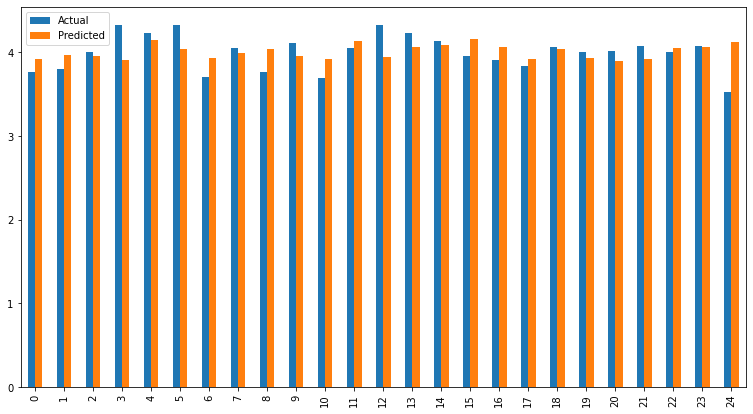

In [20]:
pred.plot(kind='bar', figsize=(13, 7))

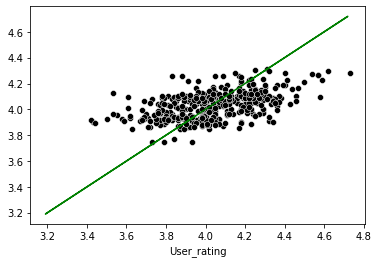

In [21]:
ax = sns.scatterplot(x=y_test, y=predictions,color='black')
ax.plot(y_train, y_train, 'green')

<font size="3">Machine Learning: Recommendation Engine.</font>


<font size="2">credit:https://www.kaggle.com/snanilim/book-recommendation-engine </font>

In [326]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6999 non-null   int64  
 1   Name         6999 non-null   object 
 2   Author       6999 non-null   object 
 3   num_page     6999 non-null   int64  
 4   Language     6999 non-null   object 
 5   User_rating  6999 non-null   float64
 6   rating_num   6999 non-null   int64  
 7   Reviews      6999 non-null   int64  
 8   Genre_1      6999 non-null   object 
 9   G_1_id       6999 non-null   int64  
 10  fiction      6999 non-null   int64  
 11  non_fiction  6999 non-null   int64  
 12  Genre_2      6999 non-null   object 
 13  Genre_3      6999 non-null   object 
 14  Year         6999 non-null   int64  
 15  Publisher    6999 non-null   object 
dtypes: float64(1), int64(8), object(7)
memory usage: 875.0+ KB


In [4]:
df1 = df3.drop(df3.index[df3['Reviews'] <= 3000])

In [5]:
df1 = df1.drop(df1.index[df1['rating_num'] <= 30000])

In [9]:
df1.loc[ (df1['User_rating'] >= 0) & (df1['User_rating'] <= 1), 'rating_between'] = "between_0_to_1"
df1.loc[ (df1['User_rating'] > 1) & (df1['User_rating'] <= 2), 'rating_between'] = "between_1_to_2"
df1.loc[ (df1['User_rating'] > 2) & (df1['User_rating'] <= 3), 'rating_between'] = "between_2_to_3"
df1.loc[ (df1['User_rating'] > 3) & (df1['User_rating'] <= 4), 'rating_between'] = "between_3_to_4"
df1.loc[ (df1['User_rating'] > 4) & (df1['User_rating'] <= 5), 'rating_between'] = "between_4_to_5"

In [10]:
rating_between_df = df1['rating_between'].str.get_dummies(sep=",")


In [11]:
lang_df = df1['Language'].str.get_dummies(sep=",")

In [12]:
encode_gen1 = df1['Genre_1'].str.get_dummies(sep=",")
encode_gen2 = df1['Genre_2'].str.get_dummies(sep=",")

In [13]:
engine_features = pd.concat([rating_between_df, lang_df, encode_gen1 ,encode_gen2, df1['User_rating'], df1['rating_num']], axis=1)
engine_features.head()

,between_3_to_4,between_4_to_5,Arabic,English,French,German,Norwegian,Polish,Scots,Spanish,...,Urban Fantasy,Vampires,War,Westerns,Womens Fiction,Writing,Young Adult,Zombies,User_rating,rating_num
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.81,283881
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.20,287556
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.90,285887
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.11,175314
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.91,238212


In [14]:
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(engine_features)

In [15]:
engine_model = neighbors.NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

In [16]:
engine_model.fit(engine_features)

NearestNeighbors(algorithm='ball_tree')

In [17]:
dist, idlist = engine_model.kneighbors(engine_features)

In [18]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = df1[df1['Name'] == book_name].index
    book_id = book_id[0]
#     print('book_id', book_id)
    for newid in idlist[book_id]:
#         print(newid)
        book_list_name.append(df1.loc[newid].Name)
#         print(new_data.loc[newid].title)
    return book_list_name

In [19]:
df1["Name"].head(20)

0                            A Farewell to Arms
1                             A Little Princess
2                                   Neuromancer
3                                    The Rescue
5                          The Andromeda Strain
8                                  Wonderstruck
9                             An Anonymous Girl
12                                   The Cellar
14                             The Hunger Games
15    Harry Potter and the Order of the Phoenix
16                        To Kill a Mockingbird
17                          Pride and Prejudice
18                                     Twilight
19                               The Book Thief
20                                  Animal Farm
21                     The Chronicles of Narnia
23                       The Fault in Our Stars
24                           Gone with the Wind
25         The Hitchhiker's Guide to the Galaxy
26                              The Giving Tree
Name: Name, dtype: object

In [26]:
book_list_name = book_recommendation_engine('The Fault in Our Stars')
book_list_name

['The Fault in Our Stars',
 'Water for Elephants',
 'Life of Pi',
 'The Chronicles of Narnia',
 'Dracula']